In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn import svm

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [5]:
# load data
data = loadmat('./ex6data1.mat')
X, y = data['X'],data['y']

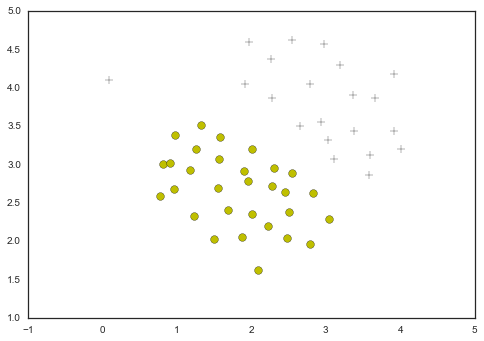

In [6]:
# plot data
def plotData(X,y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(X[pos,0],X[pos,1],marker='+',s=60,c='k')
    plt.scatter(X[neg,0],X[neg,1],marker='o',s=60,c='y')
plotData(X,y)

In [27]:
#Function to draw the SVM boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.c_[xvals[i],yvals[j]]))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( u, v, zvals )
    plt.title("Decision Boundary")

In [ ]:
# Run the SVM training (with C = 1) using SVM software. 
# When C = 1, you should find that the SVM puts the decision boundary 
# in the gap between the two datasets and misclassifies the data point on the far left

#First we make an instance of an SVM with C=1 and 'linear' kernel
linear_svm = svm.SVC(C=1, kernel='linear')
#Now we fit the SVM to our X matrix (no bias unit)
linear_svm.fit( X, y.ravel() )
#Now we plot the decision boundary
plotData(X,y)
plotBoundary(linear_svm,0,4.5,1.5,5)